In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

## Step1 : Data Cleaning

In [5]:
# In production columns : Two decimals are present
# In Production per person/Acreage/Yield : Decimal is followed by comma

In [5]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.', '')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [17]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
# Column names have spaces between them

In [6]:
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person_(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield_(Kg/Hectare)'},inplace=True)


In [19]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              1
Yield_(Kg/Hectare)            1
dtype: int64

In [8]:
df[df['Acreage(Hectare)'].isnull()]
df[df['Yield_(Kg/Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
df=df.dropna().reset_index()

In [23]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [20]:
# unnecessary coulmns : index and unnamed: 0

In [10]:
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [25]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production_per_Person_(Kg)    object
Acreage(Hectare)              object
Yield_(Kg/Hectare)            object
dtype: object

In [12]:

df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person_(Kg)']=df['Production_per_Person_(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield_(Kg/Hectare)']=df['Yield_(Kg/Hectare)'].astype(float)

In [28]:
df.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production_per_Person_(Kg)    float64
Acreage(Hectare)              float64
Yield_(Kg/Hectare)            float64
dtype: object

In [13]:
df.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production_per_Person_(Kg)    101
Acreage(Hectare)              101
Yield_(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [14]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


##### How many countries produce sugarcane from reach continent?

In [15]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

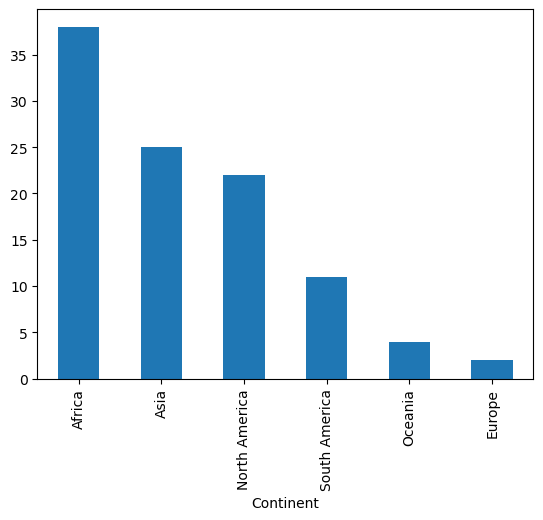

In [16]:
df['Continent'].value_counts().plot(kind='bar')

## Distribution of the columns

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_1756\3821645477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\Rutuja Navale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_1756\3821645477.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

<Axes: xlabel='Yield_(Kg/Hectare)', ylabel='Density'>

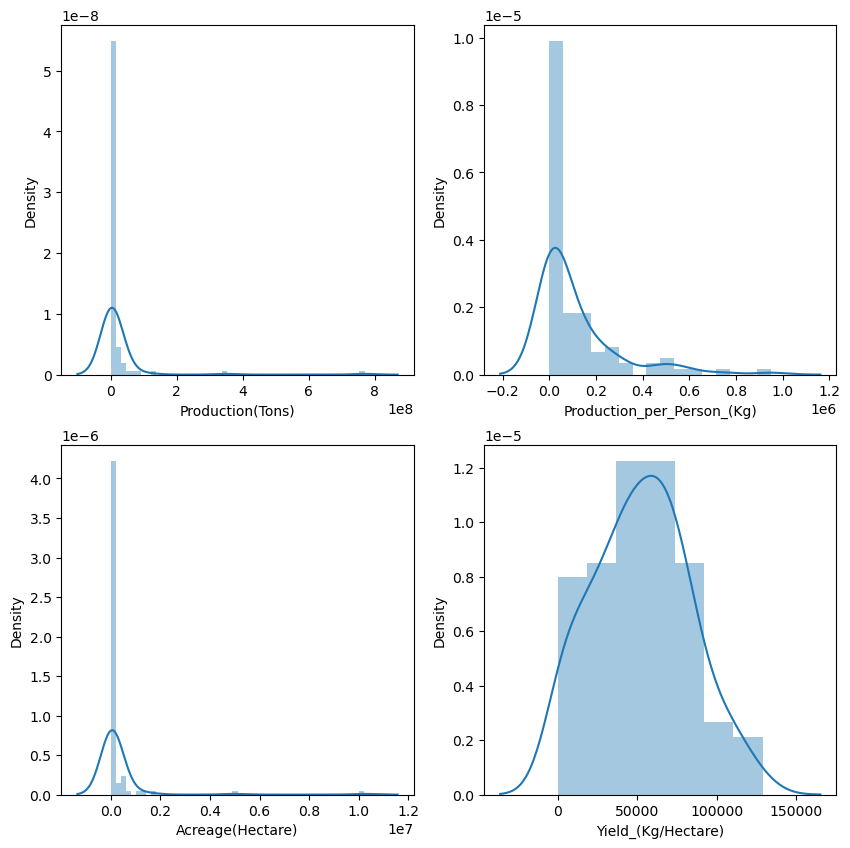

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person_(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield_(Kg/Hectare)'])

## Checking Outliers

<Axes: >

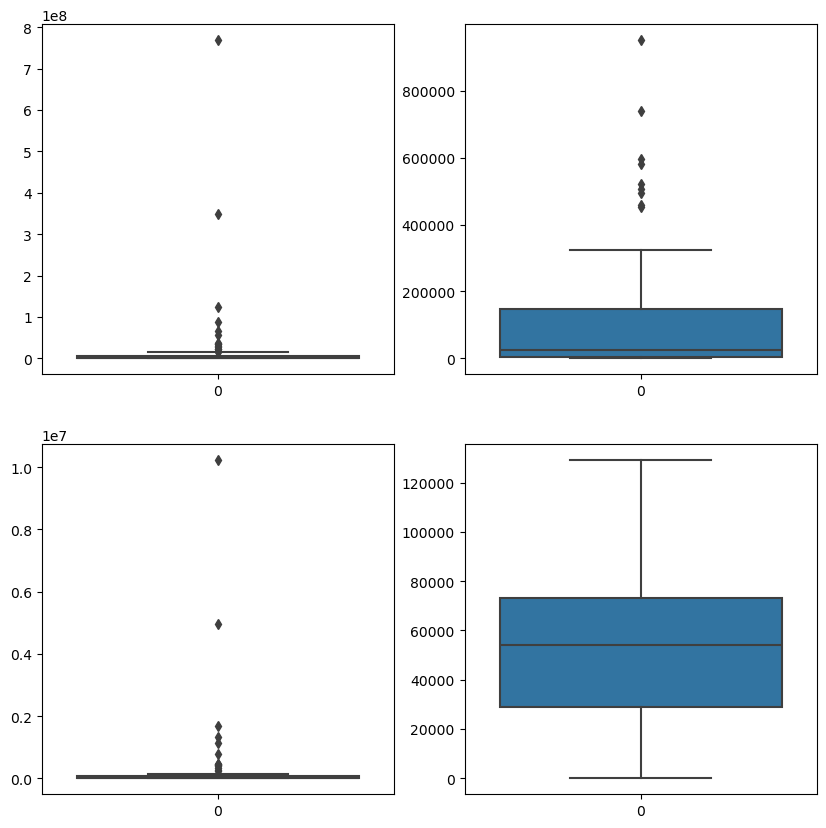

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person_(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield_(Kg/Hectare)'])

In [34]:
df.describe()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [36]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


##### Which country produces maximum sugarcane?

In [19]:
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [36]:
df_new


,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [20]:
df_new['Production(Tons)_percentage']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [21]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percentage'>

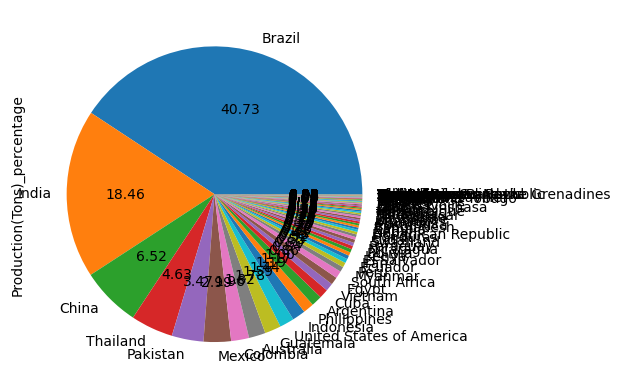

In [22]:
df_new['Production(Tons)_percentage'].plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Country'>

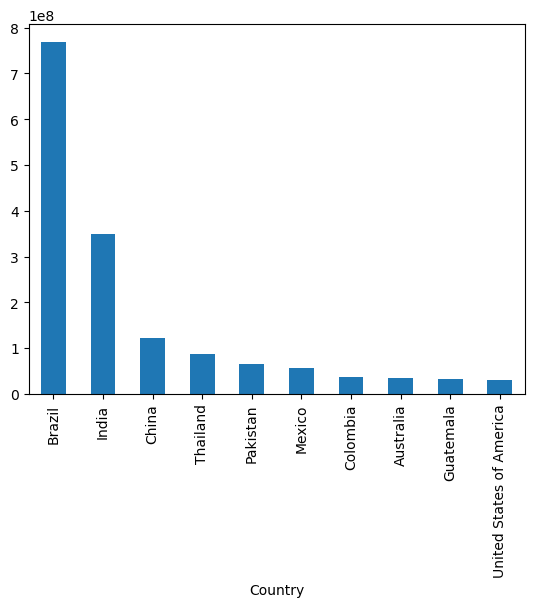

In [39]:
df_new['Production(Tons)'].head(10).plot(kind='bar')

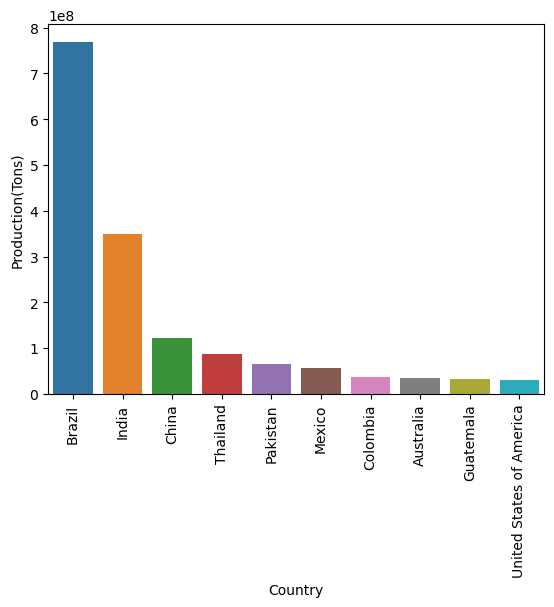

In [23]:
ax=sns.barplot(data=df.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##### WHich country has the highest land?

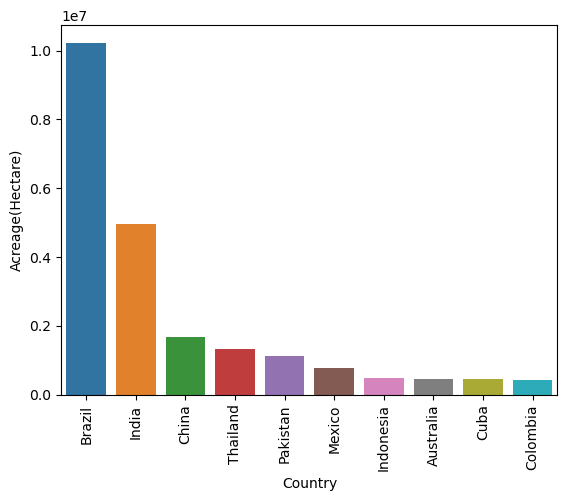

In [24]:
# To get top ten countries 
df_acr=df.sort_values('Acreage(Hectare)',ascending=False)
ax=sns.barplot(data=df_acr.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

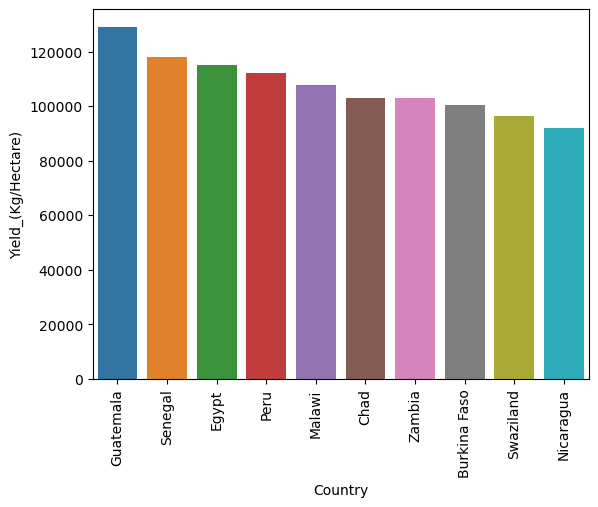

In [42]:
#Country which has highest yield
df_yeild=df.sort_values('Yield_(Kg/Hectare)',ascending=False)
ax=sns.barplot(data=df_yeild.head(10),x='Country',y='Yield_(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [44]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [25]:
columns_to_corr = ['Production(Tons)', 'Production_per_Person_(Kg)', 'Acreage(Hectare)','Yield_(Kg/Hectare)']
df[columns_to_corr].corr()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person_(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield_(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

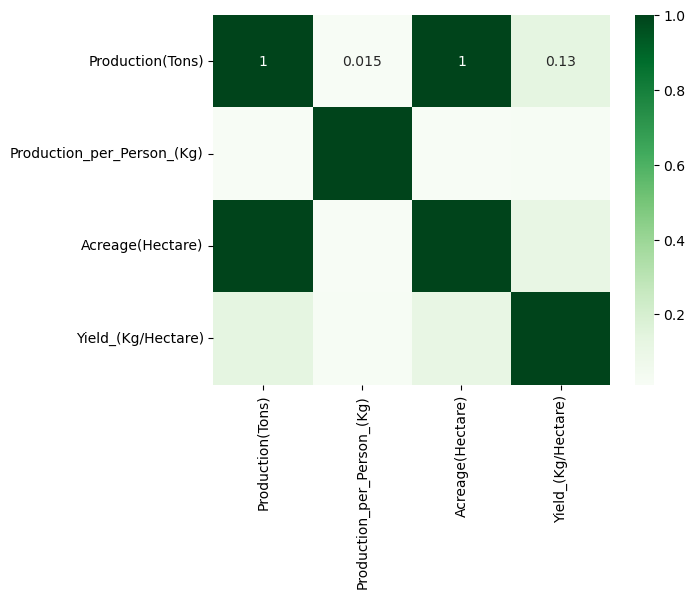

In [26]:

sns.heatmap(df[columns_to_corr].corr(),annot=True,cmap='Greens',)

In [51]:
## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

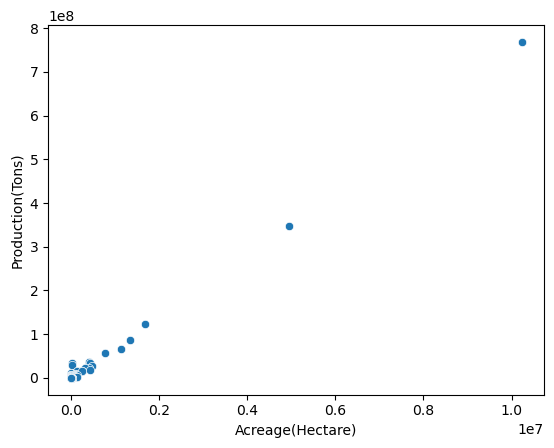

In [27]:
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)')

In [52]:
#Do countires which yield more sugarcane per hecare produces more sugarcane in total?

<Axes: xlabel='Yield_(Kg/Hectare)', ylabel='Production(Tons)'>

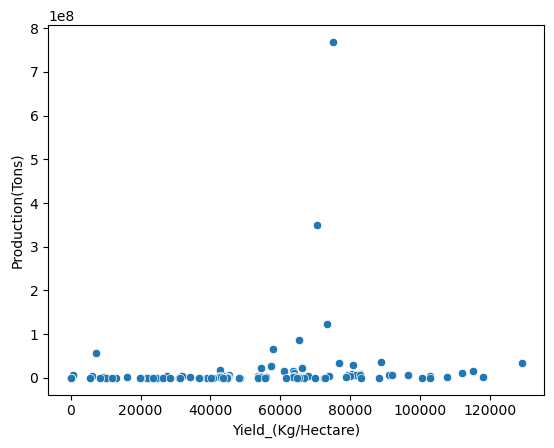

In [28]:
sns.scatterplot(data=df,x='Yield_(Kg/Hectare)',y='Production(Tons)')

## Analysis for continent

In [29]:
df_continent = df.groupby('Continent').sum()

In [56]:
df_continent

,Country,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [30]:
## Which continent produces maximun sugarcnae?

In [31]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

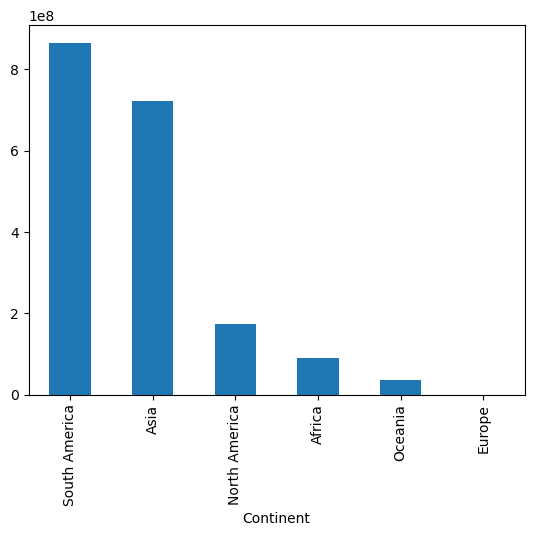

In [32]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Continent'>

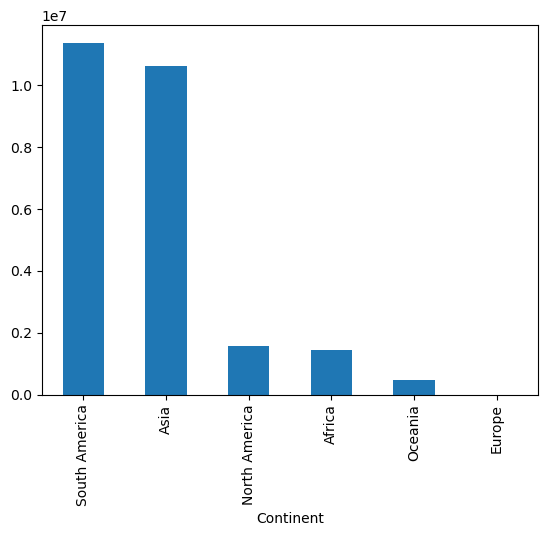

In [33]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

In [34]:
#Do number of countries in a continent affects production of sugarcane?

In [38]:
df_country_count = df.groupby('Continent')['Country'].nunique()
df_continent['number_of_countries'] = df_country_count
df_continent

,Country,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield_(Kg/Hectare),number_of_countires,number_of_countries
Continent,,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11,11


C:\Users\Rutuja Navale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rutuja Navale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


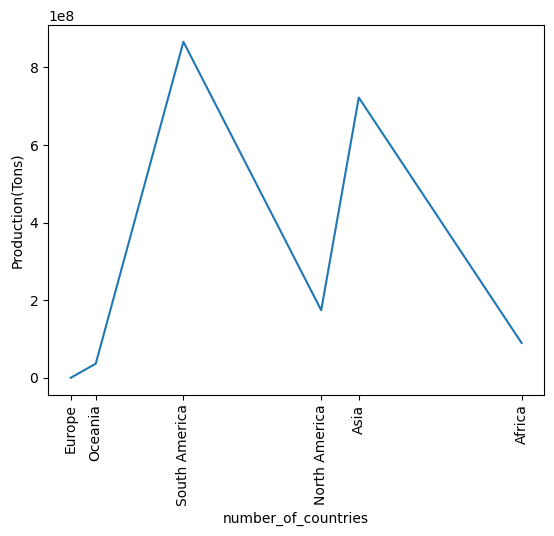

In [39]:

continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

In [40]:
#Do continent with highest land produces more sugarcane?

C:\Users\Rutuja Navale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rutuja Navale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

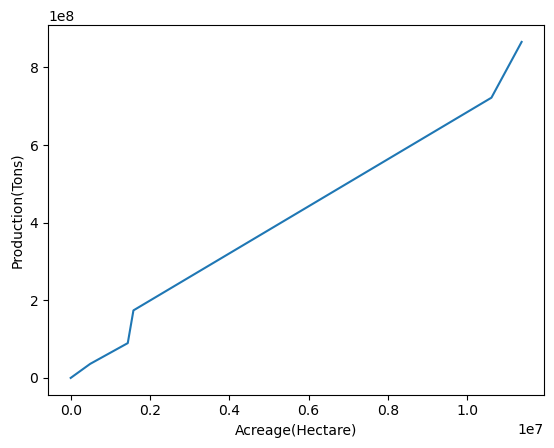

In [41]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

In [42]:
#Production distribution by continent

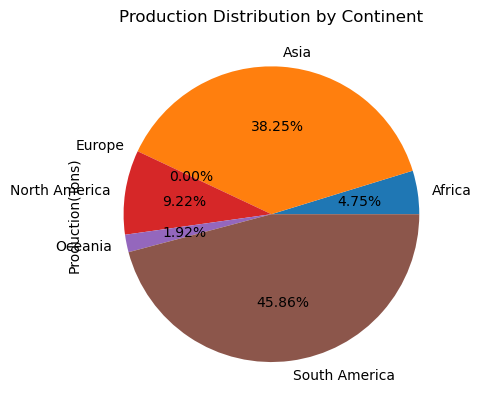

In [43]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()